# Introduction

- In the previous notebook, we have learned one-sample and two-sample hypothesis testing.

- Now, we will start today with examples on how to do Chi-Square and ANOVA hypothesis testing.

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Part 01: Chi-Square

- In this case, assume that we want to test if there is a statistically significant difference in Genders (M, F) population between Smokers and Non-Smokers.

- $H_0$ : `Smokers` and `Gender` are independent
- $H_1$ : `Smokers` and `Gender` are dependent

- We set the critical value to be 0.05.

In [ ]:
df = pd.DataFrame({'Gender' : ['M', 'M', 'M', 'F', 'F'] * 10,
                   'isSmoker' : ['Smoker', 'Smoker', 'Non-Smoker', 'Non-Smoker', 'Smoker'] * 10
                  })
df.head()

,Gender,isSmoker
0,M,Smoker
1,M,Smoker
2,M,Non-Smoker
3,F,Non-Smoker
4,F,Smoker


- To run the Chi-Square Test, the easiest way is to convert the data into a contingency table with frequencies. We will use the `crosstab` command from pandas.

In [ ]:
contigency= pd.crosstab(df['Gender'], df['isSmoker'])
contigency

isSmoker,Non-Smoker,Smoker
Gender,,
F,10,10
M,10,20


- Now, we want to get the percentages by gender.

- This can be done easily using the `normalize` parameter.

In [ ]:
contigency_pct = pd.crosstab(df['Gender'], df['isSmoker'], normalize='index')
contigency_pct

isSmoker,Non-Smoker,Smoker
Gender,,
F,0.500000,0.500000
M,0.333333,0.666667


- We can visualize the contingency table usign heatmap.

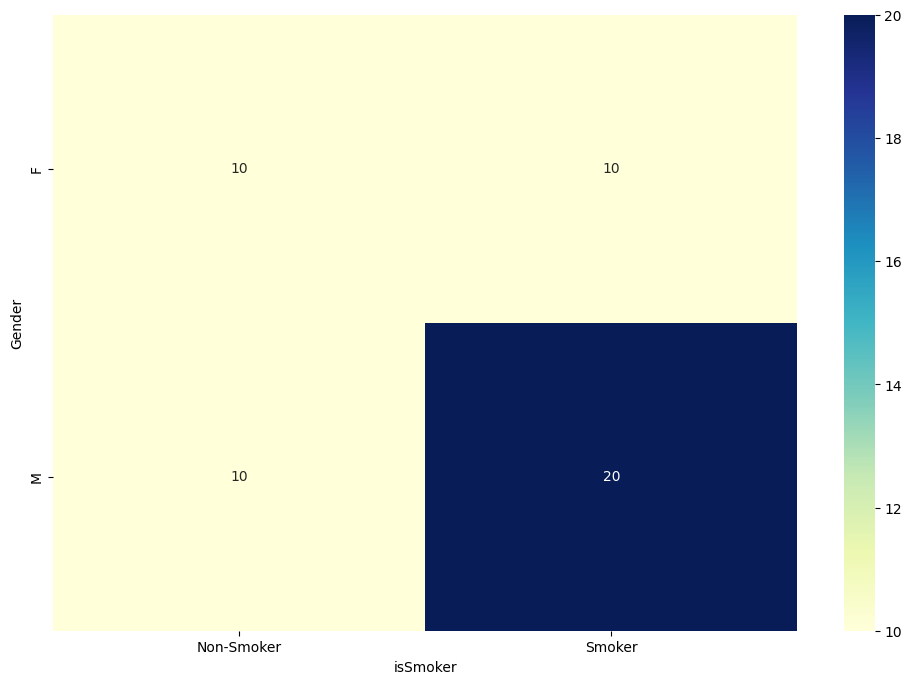

In [ ]:
plt.figure(figsize=(12,8))

sns.heatmap(contigency,
            annot=True,
            cmap="YlGnBu")

plt.show()

- Now we run the chi-square test.

In [ ]:
# Import library
from scipy.stats import chi2_contingency

In [ ]:
# Chi-square test of independence
c, p, dof, expected = chi2_contingency(contigency)


# Print the p-value
print("p-value : {}".format(p))

p-value : 0.3767591178115821


## Conclusion

- The p-value is 0.3767 which is more than the critical value of 0.05. This means that we do not reject the null hypothesis.

- We can conclude that there is not enough evidence that `Smoker` and `Gender` are dependent.



---



---



# ANOVA

- In this case study,  imagine a bunch of students from different colleges taking the same exam. You want to see if one college outperforms the other, hence your null hypothesis is that the means of GPAs in each group are equivalent to those of the other groups.

- To keep it simple, we will consider 3 groups (college A, B, C) with 6 students each.


- α = 0.05

- $H_0 : μ_A = μ_B = μ_C$

- $H_1 : μ_A \not= μ_B \not= μ_C$



In [ ]:
a=[25,25,27,30,23,20]
b=[30,30,21,24,26,28]
c=[18,30,29,29,24,26]

list_of_tuples = list(zip(a, b,c))

df = pd.DataFrame(list_of_tuples, columns = ['A', 'B', 'C'])
df

,A,B,C
0,25,30,18
1,25,30,30
2,27,21,29
3,30,24,29
4,23,26,24
5,20,28,26


- We assume that:

  - Response variable residuals are normally distributed (or approximately normally distributed).
  
  - Variances of populations are equal.
  
  - Responses for a given group are independent and identically
  distributed normal random variables

- Then the first step is to compute the average score for each college.

In [ ]:
m1=np.mean(a)
m2=np.mean(b)
m3=np.mean(c)

print('Average mark for college A: {}'.format(m1))
print('Average mark for college B: {}'.format(m2))
print('Average mark for college C: {}'.format(m3))

Average mark for college A: 25.0
Average mark for college B: 26.5
Average mark for college C: 26.0


- Then, we can compute the overall mean

In [ ]:
m = (m1+m2+m3)/3

print('Overall mean: {}'.format(m))

Overall mean: 25.833333333333332


- Next, we compute the 'between-group' sum of squared differences (where n is the number of observations per group/college, hence in our case n=6)

  - $SS_B = n (\bar{Y}_1 - \bar{Y})^2 + n (\bar{Y}_2 - \bar{Y})^2 + n (\bar{Y}_3 - \bar{Y})^2$

In [ ]:
SSb=6*((m1-m)**2+(m2-m)**2+(m3-m)**2)

print('Between-groups Sum of Squared Differences: {}'.format(SSb))

Between-groups Sum of Squared Differences: 6.999999999999999


- Now we should be able to calculate the between-group mean square value (Msb).

  - $Msb = \frac{SSb}{degree of freedom}$

In [ ]:
MSb = SSb/2

print('Between-groups Mean Square value: {}'.format(MSb))

Between-groups Mean Square value: 3.4999999999999996


- Calculate the 'within-group' sum of squares.
  - $SSw = Σ_i Σ_j (Y_ij - \bar{Y}_j)^2  $

In [ ]:
err_a = list(a-m1)
err_b = list(b-m2)
err_c = list(c-m3)

err = err_a + err_b + err_c

ssw=[]

for i in err:
    ssw.append(i**2)

SSw = np.sum(ssw)

print('Within-group Sum of Squared Differences: {}'.format(SSw))

Within-group Sum of Squared Differences: 223.5


- Compute the within-group mean square value.
  - $MS_W = \frac {SSw}{degree of freedom}$

In [ ]:
MSw = SSw/15

print('Within-group Mean Square value: {}'.format(MSw))

Within-group Mean Square value: 14.9


- Last, compute the F-Score

  - $F = \frac{MS_B}{MS_W}$

In [ ]:
F = MSb/MSw

print('F-score: {}'.format(F))

F-score: 0.23489932885906037


- Now check the resul using `scipy`.

In [ ]:
# Import the library
import scipy.stats as stats

In [ ]:
stats.f_oneway(a, b, c)

F_onewayResult(statistic=0.2348993288590604, pvalue=0.793504662732833)

- If the assumptions above are true, the ratio `MSb/MSw` behaves as a Fisher distribution with (2,15) degrees of freedom.

In [ ]:
from scipy.stats import f

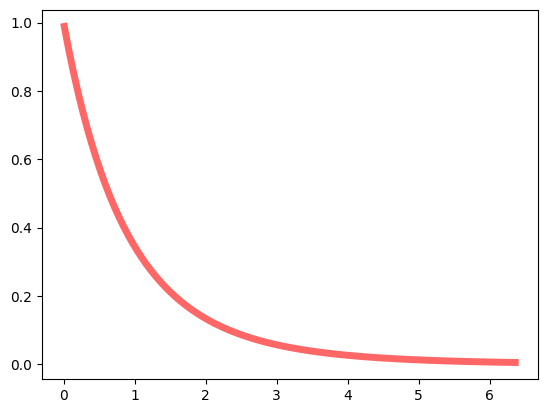

In [ ]:
fig, ax = plt.subplots()

dfn, dfd = 2,15

x = np.linspace(f.ppf(0.01, dfn, dfd),f.ppf(0.99, dfn, dfd), 100)

ax.plot(x, f.pdf(x, dfn, dfd),'r-', lw=5, alpha=0.6, label='f pdf')

plt.show()

- Let’s say we set alpha to 0.05. The corresponding F-critical value is 3.68.

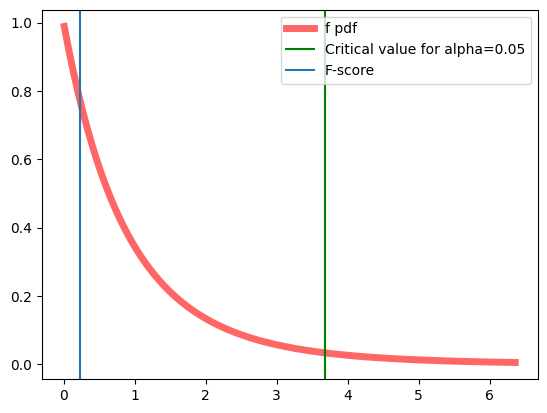

In [ ]:
fig, ax = plt.subplots()

dfn, dfd = 2,15

x = np.linspace(f.ppf(0.01, dfn, dfd),f.ppf(0.99, dfn, dfd), 100)

ax.plot(x, f.pdf(x, dfn, dfd),'r-', lw=5, alpha=0.6, label='f pdf')

plt.axvline(x=3.68, label='Critical value for alpha=0.05', color='g')
plt.axvline(x=F, label='F-score')

plt.legend()

plt.show()

- In conclusion, we do not reject the null hypothesis.

- There is no significant difference between the three colleges (A, B, and C).

# End of Notebook